# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


Megeing data

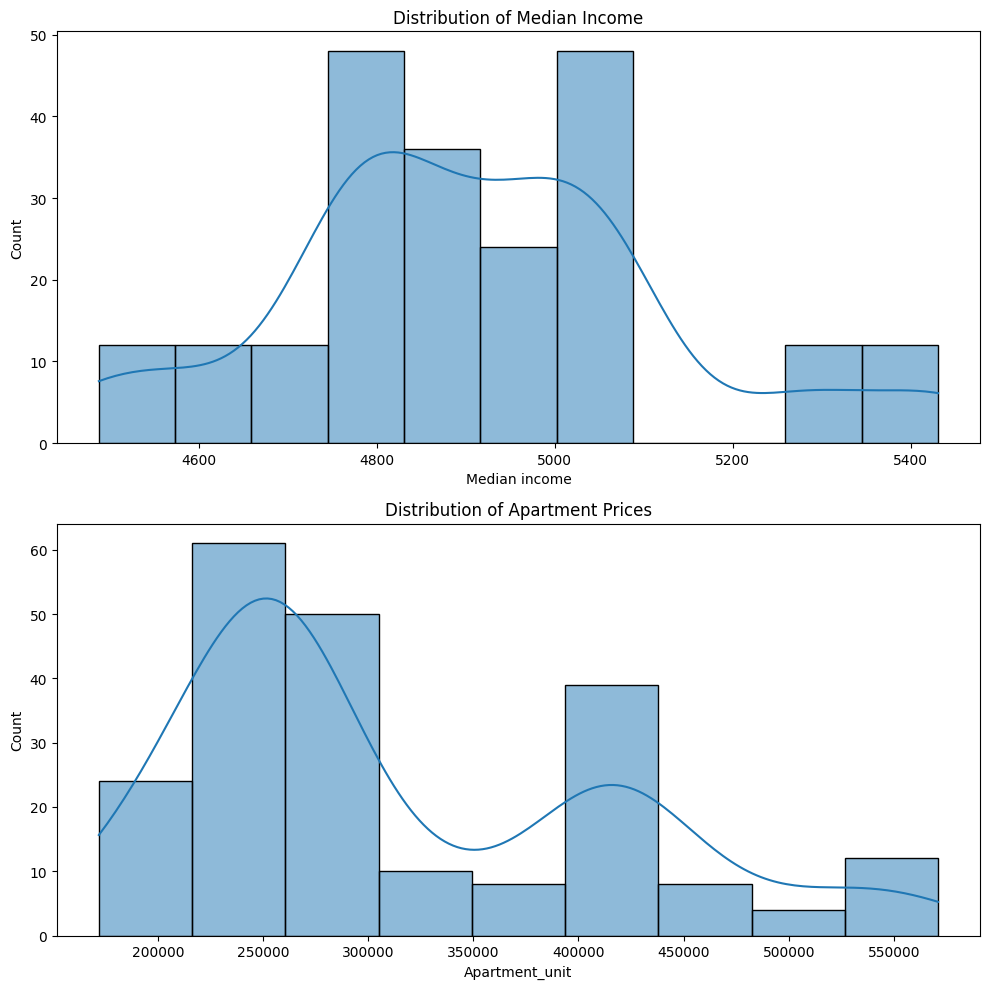

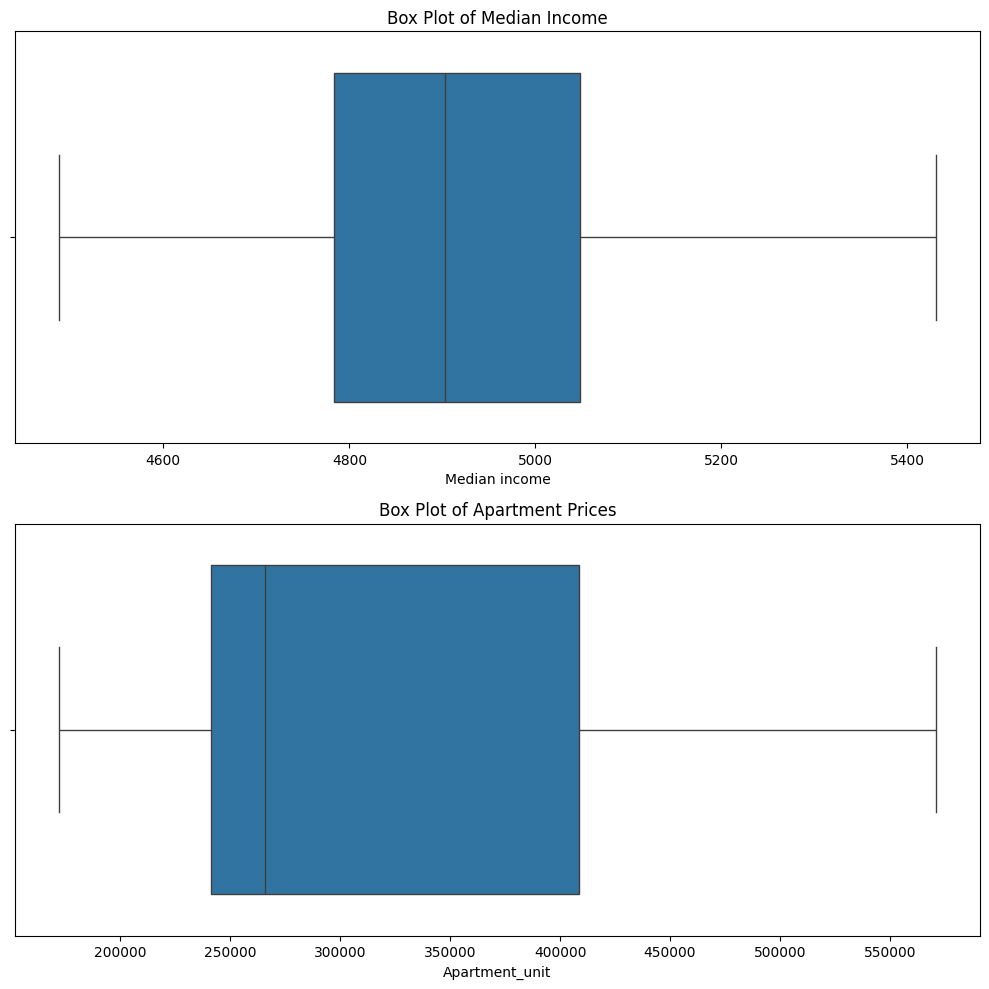

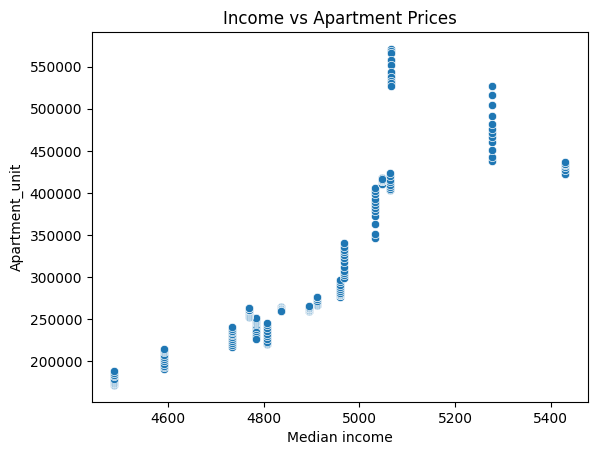

In [22]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

class IncomeDataProcessor:
    """
    A class to process income and house price data.
    """

    def __init__(self, income_data_path, original_data_path):
        """
        Initializes the class with the given data paths.

        Args:
            income_data_path (str): Path to the income data CSV file.
            original_data_path (str): Path to the original data Excel file.
        """
        self.income_data = pd.read_csv(income_data_path)
        self.original_data = pd.read_excel(original_data_path)

    def clean_data(self):
        """
        Cleans the income data by removing currency symbols and converting to numeric.
        """
        self.income_data['Median income'] = self.income_data['Median income'].str.replace('$', '').str.replace(',', '').astype(float)

    def convert_to_monthly(self):
        """
        Converts annual income to monthly income and creates a new DataFrame.
        """
        new_rows = []
        
        for index, row in self.income_data.iterrows():
            year = row["Reference year"]
            median_income = row["Median income"] / 12  # Convert to monthly income
            
            for month in range(1, 13):
                date_str = f"{year}-{month:02d}-01"
                date = pd.to_datetime(date_str, format='%Y-%m-%d')
                
                new_row = {
                    "Date": date,
                    "Median income": median_income,
                    "Count of families": row["Count of families"],
                    "Family type": row["Family type"],
                    "Geography": row["Geography"],
                    "Selected income concept": row["Selected income concept"]
                }
                new_rows.append(new_row)
        
        self.monthly_data = pd.DataFrame(new_rows)
        
        return self.monthly_data

    def merge_data(self):
        """
        Merges the income data with the original data based on the 'Date' column.
        """
        self.monthly_data['Date'] = pd.to_datetime(self.monthly_data['Date'], format='%Y-%m-%d')
        self.merged_data = pd.merge(self.original_data, self.monthly_data[['Date', 'Median income']], on='Date', how='left')
        # Filter data from 2005 to 2022
        self.merged_data = self.merged_data[(self.merged_data['Date'].dt.year >= 2005) & 
                                           (self.merged_data['Date'].dt.year <= 2022)]
        return self.merged_data
    
    def apply_kmeans_clustering(self, n_clusters=3):
        """
        Applies K-Means clustering on 'Median income' and 'Apartment_unit' columns.
        
        Args:
            n_clusters (int): Number of clusters to form.
        
        Returns:
            DataFrame with a new 'Cluster' column.
        """
        clustering_data = self.merged_data[['Median income', 'Apartment_unit']].dropna()
        
        # Data scaling
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(clustering_data)

        # K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)
        
        # Plot clusters
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            x='Median income', y='Apartment_unit', 
            hue='Cluster', data=clustering_data, palette='viridis'
        )
        plt.title("Clustering of Income and Apartment Prices")
        plt.show()

        return clustering_data

    def save_data(self, output_path):
        """
        Saves the merged data to a CSV file.
        """
        self.merged_data.to_csv(output_path)
    
    def exploratory_data_analysis(self):
        """
        Performs exploratory data analysis, including:
            - Visualizing the relationship between income and house price
            - Histogram and box plot of income and apartment prices
        """

        # Histogramas de Median income y Apartment_unit
        plt.figure(figsize=(10, 10))

        # Histogram of Median income
        plt.subplot(2, 1, 1)
        sns.histplot(self.merged_data['Median income'].dropna(), kde=True)
        plt.title("Distribution of Median Income")

        # Histogram of Apartment_unit prices
        plt.subplot(2, 1, 2)
        sns.histplot(self.merged_data['Apartment_unit'].dropna(), kde=True)
        plt.title("Distribution of Apartment Prices")

        plt.tight_layout()
        plt.show()

        # Boxplots de Median income y Apartment_unit
        plt.figure(figsize=(10, 10))

        # Box plot of Median income
        plt.subplot(2, 1, 1)
        sns.boxplot(x=self.merged_data['Median income'].dropna())
        plt.title("Box Plot of Median Income")

        # Box plot of Apartment_unit prices
        plt.subplot(2, 1, 2)
        sns.boxplot(x=self.merged_data['Apartment_unit'].dropna())
        plt.title("Box Plot of Apartment Prices")

        plt.tight_layout()
        plt.show()

        # Scatter plot of income vs apartment prices
        sns.scatterplot(x='Median income', y='Apartment_unit', data=self.merged_data)
        plt.title("Income vs Apartment Prices")
        plt.show()


# Example usage
processor = IncomeDataProcessor('incomedata.csv', 'News_release_chart_data_August_2024.xlsx')
processor.clean_data()
processor.convert_to_monthly()
data = processor.merge_data()
data
processor.exploratory_data_analysis()
#processor.save_data('mergeddata.csv')


### Application of Clustering in Income and Housing Price Analysis

Clustering is a Machine Learning technique that allows us to group data into categories based on patterns or similarities. In the context of this analysis, the use of clustering can help us identify income groups and housing types that have similar characteristics. By grouping monthly income and housing price data, we can find common patterns among certain categories of families or housing types, which can reveal trends in the real estate market or income segmentations.

### Variables Selected for Clustering

The variables selected to apply the K-means algorithm are:
- **Median income**: represents the average monthly income, and is useful for identifying the purchasing power of different families.
- **Apartment_unit**: represents the price of an apartment unit, which can reflect trends in housing prices in different segments.

These variables allow us to group the data into categories where we can identify patterns in income and housing prices.

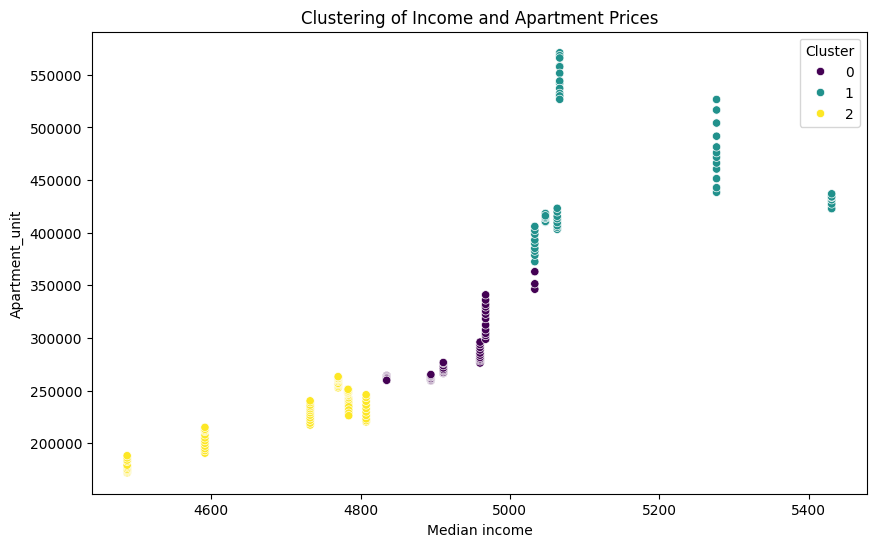

In [23]:
# Apply K-means clustering and visualize
clustered_data = processor.apply_kmeans_clustering(n_clusters=3)

### Clustering Results Analysis

The K-means clustering analysis has grouped the data into three categories, representing different income and housing price segments. The clusters can be interpreted as follows:

- **Cluster 0**: This group contains families with lower median incomes and more affordable apartment prices.
- **Cluster 1**: This group groups moderate median incomes with apartment prices in the middle range.
- **Cluster 2**: This group includes families with higher median incomes and significantly higher apartment prices.

These clusters reflect different income and behavior patterns in the housing market, which can be useful for segmenting the market and targeting housing policies.